### Caso do Titanic 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


PassengerId: Número de identificação do passageiro; <br>
Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;<br>
Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;<br>
Name: Nome do passageiro;<br>
Sex: Sexo do passageiro;<br>
Age: Idade do passageiro em anos;<br>
SibSp: Quantidade de irmãos e cônjuges a bordo ;<br>
Parch: Quantidade de pais e filhos a bordo;<br>
Ticket: Número da passagem;<br>
Fare: Preço da passagem;<br>
Cabin: Número da cabine do passageiro;<br>
Embarked: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

In [4]:
# Retirar dados irrelevantes (nome, tickt, cabine)


In [5]:
titanic.drop(
    labels = ['deck','embark_town','embarked'],
    axis = 1,
    inplace = True,#Substitui e salva na tabela Titanic   
)

In [6]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True


In [7]:
#Transformando string em números com get_dummines()
new_titanic = pd.get_dummies(titanic)
new_titanic.head(3)
#Os modelos só entendem números, por isso.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,1,0,0,0,0,1,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,0,0,1,0,0,1,0,1


In [8]:
new_titanic.isnull().head(6)
#Existem números nulos na tabela.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,alive_no,alive_yes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
new_titanic.isnull().sum()
#Mais precisamente 177 pessoas não tem a idade
#fornecida... ou seja

survived          0
pclass            0
age             177
sibsp             0
parch             0
fare              0
adult_male        0
alone             0
sex_female        0
sex_male          0
class_First       0
class_Second      0
class_Third       0
who_child         0
who_man           0
who_woman         0
alive_no          0
alive_yes         0
dtype: int64

In [10]:
#Retirei as linhas que apresentavam NaN (não número)

for i in range(0,len(new_titanic)):
    
    if pd.isnull(new_titanic['age'][i]) == True:
        
        new_titanic.drop(
            labels = i,
            axis = 0,
            inplace = True,#tem que substituir
        )

In [11]:
new_titanic.reset_index(inplace = True) # Resetei os índices, para ficar na ordem sem faltar número.

In [12]:
new_titanic.head()

,index,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,alive_no,alive_yes
0,0,0,3,22.0,1,0,7.2500,True,False,0,1,0,0,1,0,1,0,1,0
1,1,1,1,38.0,1,0,71.2833,False,False,1,0,1,0,0,0,0,1,0,1
2,2,1,3,26.0,0,0,7.9250,False,True,1,0,0,0,1,0,0,1,0,1
3,3,1,1,35.0,1,0,53.1000,False,False,1,0,1,0,0,0,0,1,0,1
4,4,0,3,35.0,0,0,8.0500,True,True,0,1,0,0,1,0,1,0,1,0


O algoritmo de Árvore de Decisão funciona de forma semelhante a um fluxograma: se determinada condição for atingida, ele segue um caminho, senão, ele segue outro. A chamada “Árvore” é a toda a estrutura do fluxograma.

In [13]:
from sklearn.tree import DecisionTreeClassifier

Abaixo, eu crio duas variáveis: X, que armazenará nossos features, ou seja, os dados do passageiro; e a variável y, que irá armazenar o que nós queremos prever, nesse caso, a coluna Survived, que informa se o tripulante sobreviveu ou não.

In [14]:
X = new_titanic.drop('survived',axis = 1)
y = new_titanic['survived']

In [15]:
tree = DecisionTreeClassifier(
    max_depth=1, # número de perguntas
    random_state=0,
)

tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
tree.score(X,y)

1.0

In [17]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

## Parte - 2 

In [18]:
titanic = sns.load_dataset('titanic')

In [19]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


PassengerId: Número de identificação do passageiro; <br>
Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;<br>
Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;<br>
Name: Nome do passageiro;<br>
Sex: Sexo do passageiro;<br>
Age: Idade do passageiro em anos;<br>
SibSp: Quantidade de irmãos e cônjuges a bordo ;<br>
Parch: Quantidade de pais e filhos a bordo;<br>
Ticket: Número da passagem;<br>
Fare: Preço da passagem;<br>
Cabin: Número da cabine do passageiro;<br>
Embarked: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

In [20]:
# Retirar dados irrelevantes (nome, tickt, cabine)


In [21]:
titanic.drop(
    labels = ['deck','embark_town','embarked'],
    axis = 1,
    inplace = True,#Substitui e salva na tabela Titanic   
)

In [22]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True


In [23]:
#Transformando string em números com get_dummines()
new_titanic = pd.get_dummies(titanic)
new_titanic.head(3)
#Os modelos só entendem números, por isso.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,1,0,0,0,0,1,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,0,0,1,0,0,1,0,1


In [24]:
new_titanic.isnull().head(6)
#Existem números nulos na tabela.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,alive_no,alive_yes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
new_titanic.isnull().sum()
#Mais precisamente 177 pessoas não tem a idade
#fornecida... ou seja

survived          0
pclass            0
age             177
sibsp             0
parch             0
fare              0
adult_male        0
alone             0
sex_female        0
sex_male          0
class_First       0
class_Second      0
class_Third       0
who_child         0
who_man           0
who_woman         0
alive_no          0
alive_yes         0
dtype: int64

In [26]:
new_titanic.isnull().sum().sort_values(ascending=False)

age             177
alive_yes         0
alive_no          0
pclass            0
sibsp             0
parch             0
fare              0
adult_male        0
alone             0
sex_female        0
sex_male          0
class_First       0
class_Second      0
class_Third       0
who_child         0
who_man           0
who_woman         0
survived          0
dtype: int64

In [27]:
#Colocar dados nos valores nulos (vou colocar média)

new_titanic['age'].fillna(
    value = new_titanic['age'].mean(),
    inplace = True,
)


In [28]:
new_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
survived        891 non-null int64
pclass          891 non-null int64
age             891 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
adult_male      891 non-null bool
alone           891 non-null bool
sex_female      891 non-null uint8
sex_male        891 non-null uint8
class_First     891 non-null uint8
class_Second    891 non-null uint8
class_Third     891 non-null uint8
who_child       891 non-null uint8
who_man         891 non-null uint8
who_woman       891 non-null uint8
alive_no        891 non-null uint8
alive_yes       891 non-null uint8
dtypes: bool(2), float64(2), int64(4), uint8(10)
memory usage: 52.3 KB


In [29]:
#new_titanic.isnull().sum().sort_values(ascending = False)

In [30]:
#new_titanic.reset_index(inplace = True) # Resetei os índices, para ficar na ordem sem faltar número.

In [31]:
new_titanic.head(6)

#observe a média no índice 5 da idade

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,alive_no,alive_yes
0,0,3,22.000000,1,0,7.2500,True,False,0,1,0,0,1,0,1,0,1,0
1,1,1,38.000000,1,0,71.2833,False,False,1,0,1,0,0,0,0,1,0,1
2,1,3,26.000000,0,0,7.9250,False,True,1,0,0,0,1,0,0,1,0,1
3,1,1,35.000000,1,0,53.1000,False,False,1,0,1,0,0,0,0,1,0,1
4,0,3,35.000000,0,0,8.0500,True,True,0,1,0,0,1,0,1,0,1,0
5,0,3,29.699118,0,0,8.4583,True,True,0,1,0,0,1,0,1,0,1,0


O algoritmo de Árvore de Decisão funciona de forma semelhante a um fluxograma: se determinada condição for atingida, ele segue um caminho, senão, ele segue outro. A chamada “Árvore” é a toda a estrutura do fluxograma.

Abaixo, eu crio duas variáveis: X, que armazenará nossos features, ou seja, os dados do passageiro; e a variável y, que irá armazenar o que nós queremos prever, nesse caso, a coluna Survived, que informa se o tripulante sobreviveu ou não.

In [32]:
X = new_titanic.drop('survived',axis = 1)
y = new_titanic['survived']

In [33]:
tree = DecisionTreeClassifier(
    max_depth=10, # número de perguntas
    random_state=0,
)

tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
tree.score(X,y)

1.0

In [35]:
y.head(6)

0    0
1    1
2    1
3    1
4    0
5    0
Name: survived, dtype: int64

## Parte 3 - Testei com dados de cresciento de Criança

In [36]:
#Regressão Linear

dados = {
    'idade': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'altura':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.9,0.95,1.0,1.0,1.1,1.3,1.32,1.5,1.6,1.62,1.75,1.80, 1.85],
    'peso': [1,3,12,16,17,20,30,32,32,30,33,32,40,45,52,56,62,59,75,82],
}

df1 = pd.DataFrame(dados)
df1.head(3)

,idade,altura,peso
0,1,0.3,1
1,2,0.4,3
2,3,0.5,12


In [37]:
X = df1.drop('peso',axis = 1)
y = df1['peso']

In [38]:
tree = DecisionTreeClassifier(
    max_depth=5, # número de perguntas
    random_state=0,
)

tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [39]:
tree.score(X,y)

0.7

Se eu aumentar o tamanho do max_depth, o score melhora

In [40]:
y.head(6)

0     1
1     3
2    12
3    16
4    17
5    20
Name: peso, dtype: int64

In [41]:
df1['peso'].head(6)

0     1
1     3
2    12
3    16
4    17
5    20
Name: peso, dtype: int64

In [42]:
df1['pred_peso'] = tree.predict(X) #Adicionei o predict do Método para ver se ele tende a uma reta

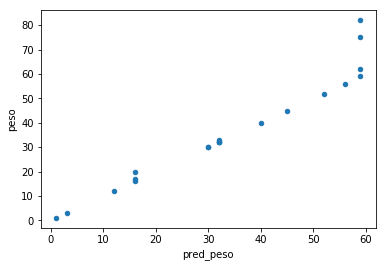

In [43]:
df1.plot(x = 'pred_peso', y = 'peso',kind = 'scatter')

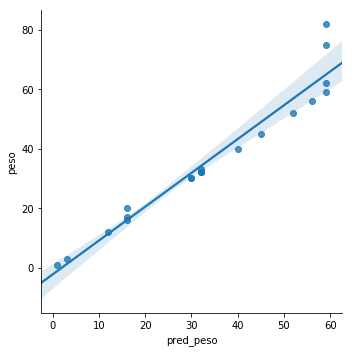

In [44]:
sns.lmplot(x = 'pred_peso',y = 'peso', data = df1)